## Working example II

In [2]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network, run_network_recall_limit
from connectivity import designed_matrix_sequences, designed_matrix_sequences_local
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence, create_sequence_chain
from analysis import time_t1, time_t2, time_t1_local, time_t2_local, time_t2_complicated

## Artificial matrix

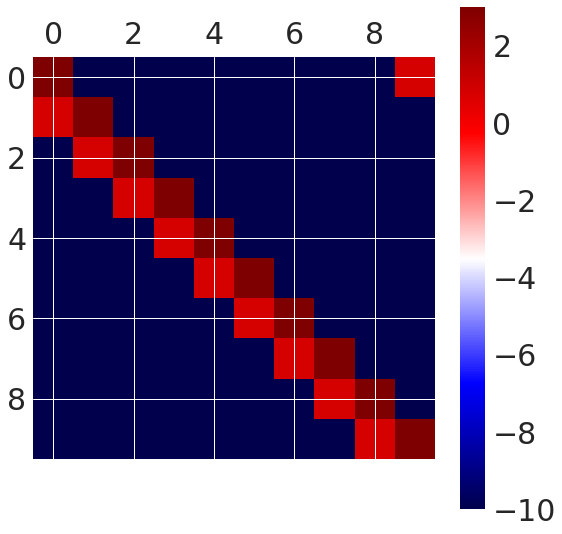

In [11]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]]
self_excitation = 3.0
transition = 0.8
inhibition = 10.0

threshold = 0.5
tau_z = 0.050

G = 100.0
tau_m = 0.010
T = 5.0
I_cue = 0
T_cue = 0.100
dt = 0.001

w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition,
                              inhibition=inhibition)
dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

plt.matshow(w, cmap='seismic')
plt.colorbar();

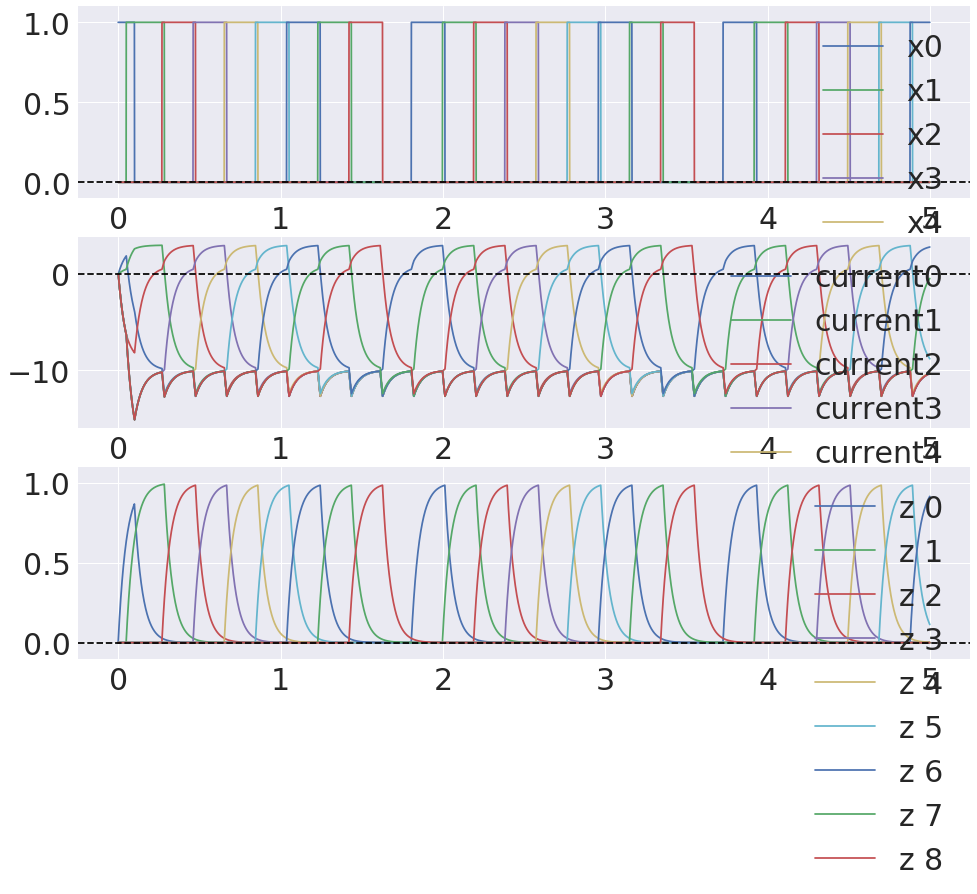

In [12]:
time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

## Training procedure

In [14]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]]
training_time = 0.250


threshold = 0.5
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.020

G = 100.0
tau_m = 0.010
T = 5.0
I_cue = 0
T_cue = 0.100
dt = 0.001

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=3, max_w=5.0, min_w=-3.0)

w = dic['w']

dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

x_total = dic['x']
z_history = dic['z']
z_post_history = dic['z_post']

plt.matshow(w, cmap='seismic')
plt.colorbar();


NameError: name 'training_time' is not defined

In [ ]:
N = 10
tau_z = 0.050

training_time = 0.100
inter_sequence_time = 0.000
dt = 0.001
sequence1 = [0, 1, 2, 3]
sequence2 = [4, 5, 6, 7, 8, 9]
sequences = [sequence1, sequence2]

